#BigARTM

In [ ]:
!pip install bigartm10

     |████████████████████████████████| 2.0 MB 34.8 MB/s 


In [ ]:
with open("data.txt", "r", encoding="utf-8") as file:
    data = file.read()
data_list = data.split()
data_list

['Обработка',
 'естественного',
 'языка',
 'в',
 'действии',
 'Для',
 'профессионалов',
 'Natural',
 'Language',
 'Processing',
 'in',
 'Action',
 'Understanding',
 'analyzing',
 'and',
 'generating',
 'text',
 'with',
 'Python',
 'HOBSON',
 'LANE',
 'COLE',
 'HOWARD',
 'HANNES',
 'MAX',
 'HAPKE',
 'Natural',
 'Language',
 'Processing',
 'in',
 'Action',
 'Understanding',
 'analyzing',
 'and',
 'generating',
 'text',
 'with',
 'Python',
 'HOBSON',
 'LANE',
 'COLE',
 'HOWARD',
 'HANNES',
 'MAX',
 'HAPKE',
 'ББК',
 'УДК',
 'Х',
 'Хобсон',
 'Лейн',
 'Ханнес',
 'Хапке',
 'Коул',
 'Ховард',
 'Х',
 'Обработка',
 'естественного',
 'языка',
 'в',
 'действии',
 'СПб',
 'Питер',
 'с',
 'ил',
 'Серия',
 'Для',
 'профессионалов',
 'ISBN',
 '-',
 '-',
 '-',
 '-',
 'Последние',
 'достижения',
 'в',
 'области',
 'глубокого',
 'обучения',
 'позволяют',
 'создавать',
 'приложения',
 'с',
 'исключительной',
 'точностью',
 'распознающие',
 'текст',
 'и',
 'речь',
 'Что',
 'в',
 'результате',
 'Появляются

In [ ]:
%%time
import artm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from numpy import array

cv = CountVectorizer(min_df=5, max_features=3500)
n_wd = array(cv.fit_transform(data_list).todense()).T
vocabulary = cv.get_feature_names()

bv = artm.BatchVectorizer(data_format='bow_n_wd', n_wd=n_wd, vocabulary=vocabulary)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:

def create_model(bv):
  topic_names = [f'Topic №{i + 1}' for i in range(20)]
  model = artm.ARTM(topic_names=topic_names, cache_theta=True,
                        scores=[artm.PerplexityScore(name='PerplexityScore',
                                                      dictionary= bv.dictionary)],
                        regularizers=[artm.SmoothSparseThetaRegularizer(name='SparseTheta', tau=-0.02)])
  model.scores.add(artm.SparsityPhiScore(name='SparsityPhiScore'))
  model.scores.add(artm.SparsityThetaScore(name='SparsityThetaScore'))
  model.scores.add(artm.TopTokensScore(name='TopTokensScore', num_tokens=35))
  model.regularizers.add(artm.SmoothSparsePhiRegularizer(name='SparsePhi', tau=-0.05))
  model.regularizers.add(artm.DecorrelatorPhiRegularizer(name='DecorrelatorPhi', tau=0.0001))
  model.num_document_passes = 10
  model.initialize(dictionary= bv.dictionary)
  model.fit_offline(batch_vectorizer=bv, num_collection_passes=15)
  return model

model = create_model(bv)
model


artm.ARTM(num_topics=20, num_tokens=3500)

In [ ]:
top_tokens = model.score_tracker['TopTokensScore']

for topic_name in model.topic_names:
  print()
  print(topic_name)
  for (token, weight) in zip(top_tokens.last_tokens[topic_name], top_tokens.last_weights[topic_name]):
    print(f'{round(weight, 3)}\t{token}')


Topic №1
0.076	чтобы
0.053	анализа
0.045	то
0.039	между
0.036	помощью
0.034	могут
0.033	есть
0.033	анализ
0.029	машинного
0.024	документы
0.023	корпусе
0.02	чтения
0.019	html
0.017	потому
0.017	лексем
0.015	извлечение
0.014	других
0.013	приложений
0.012	анализе
0.011	лучше
0.011	labels
0.01	tree
0.009	механизм
0.009	пример
0.008	yellowbrick
0.008	регулярные
0.008	наши
0.007	объекта
0.007	набора
0.007	файл
0.007	выполняет
0.007	теги
0.007	другой
0.006	одна
0.006	пространстве

Topic №2
0.191	как
0.06	языка
0.033	только
0.031	они
0.023	такие
0.022	языке
0.02	приложения
0.019	transform
0.018	векторизации
0.016	print
0.013	было
0.013	некоторые
0.012	docs
0.011	вопросы
0.011	поиск
0.01	выявления
0.01	as
0.009	pos
0.008	лишь
0.008	count
0.008	add
0.007	применение
0.007	измерения
0.007	библиотека
0.007	new
0.007	многие
0.007	networkx
0.007	контекст
0.007	важно
0.007	веб
0.007	существует
0.007	практике
0.006	эмоциональной
0.006	либо
0.006	большое

Topic №3
0.1	их
0.076	модель
0.049	который
0.0

In [ ]:
model.score_tracker['SparsityPhiScore'].last_value, model.score_tracker['SparsityThetaScore'].last_value

(0.949999988079071, 0.6657228469848633)

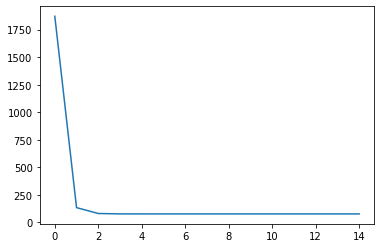

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(model.score_tracker["PerplexityScore"].value)

# 5-я неделя

In [ ]:
!pip install transformers

In [ ]:
temp = []
for topic_name in model_artm.topic_names:
  buf = []
  for token in top_tokens.last_tokens[topic_name]:
    buf.append(token)
  temp.append(buf)

In [ ]:
ARTICLE = ' '.join(temp[0])
ARTICLE

'пиксел ошибка файл операция работа поверхность приводить анализ получение оказываться важный labels многий известный величина val ния геометрический текстурный контур отдельный извлечение ребро имя поворот базовый связывать прием предлагать эталонный зрительный увеличение двигаться составлять основывать figure больший атрибут int кривая neural чение изучение rgb служить plot отражать удалять фурье план'

In [ ]:
!pip install sentencepiece

     |████████████████████████████████| 1.2 MB 5.1 MB/s 


In [ ]:
from transformers import MBartTokenizer, MBartForConditionalGeneration

model_name = "IlyaGusev/mbart_ru_sum_gazeta"
tokenizer = MBartTokenizer.from_pretrained(model_name)
model = MBartForConditionalGeneration.from_pretrained(model_name)

Downloading:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.23G [00:00<?, ?B/s]